<span style='color:red'> NOTE: You can only pass the lab, when you provide both code and markdown </span>

Use Code for your analysis
Use Markdown to document and elaborate on your findings, conclusions, assertions, etc.

# DS_ML_I_P5: Classification of Image Data

## 5.1 Load the MNIST Data-Set
* get the data using code below
* assemble information on number of images, size of images, distribution among different classes

In [108]:
from sklearn.datasets import fetch_openml
from math import sqrt
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
# if we loaded the dataset using fetch_openml before, we can use the previously stored parquet file (which laods much faster)
preloaded = True

In [56]:
if preloaded == False:
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
    display(type(X), type(y))
else:
    %time df_mnist = pd.read_parquet("MNIST.parquet")
    X = df_mnist.iloc[:, 0:784]
    y = df_mnist.iloc[:, 784]

CPU times: total: 2.19 s
Wall time: 161 ms


### Number of Images
The code try to look into sorted unique values of the class, which represent the type of images and count how many number of images exist within the dataset

In [57]:
existing_classes = df_mnist['class'].sort_values().unique()
print(f"There are {len(existing_classes)} different types of images")
print(f"They are { existing_classes}")


There are 10 different types of images
They are [0 1 2 3 4 5 6 7 8 9]


### Size of Images
As we can see below the there are columns for pixel1-pixel784, which means there are 784 pixels that represent an image.

In [88]:
df_pixels = df_mnist.drop(columns='class')
df_pixels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


Show the calculation of an image based on the amount of pixels and bytes for each pixel

In [91]:
bytes_per_pixel = df_pixels.dtypes.iloc[0].itemsize
number_of_pixels = df_pixels.shape[0]
size_of_each_image = bytes_per_pixel * number_of_pixels

print(f"Each pixel is { bytes_per_pixel} bytes")
print(f"There are {number_of_pixels} pixels for one image")
print(f"The size of an image would be {bytes_per_pixel} * { number_of_pixels} = {size_of_each_image}")

Each pixel is 8 bytes
There are 70000 pixels for one image
The size of an image would be 8 * 70000 = 560000


### Classes' Distribution
The code below counts the amount of each class and show the distribution the classses in a form of pie chart

In [60]:
class_counts = df_mnist['class'].value_counts().sort_index().reset_index()

In [61]:
fig = px.pie(
    class_counts,
    values='count',
    names='class',
    title='Distribution Among Different Classes',
)
fig.update_traces(sort=False ,textposition='inside', textinfo='percent+label')
fig.show()

## 5.2 Visualize the input data
* Display at least two images for each class in the dataset
* Show the class identity per image

In [94]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: float64(784), int32(1)
memory usage: 419.0 MB


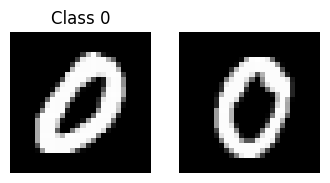

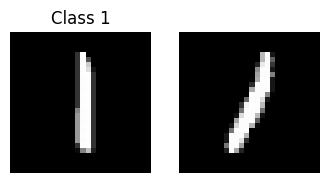

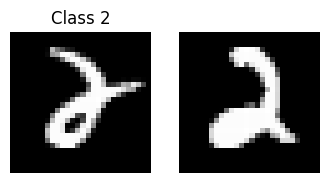

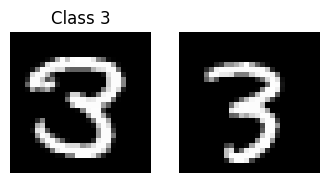

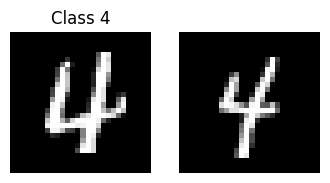

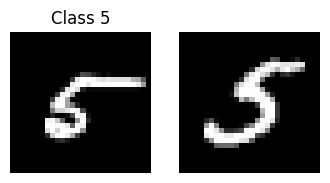

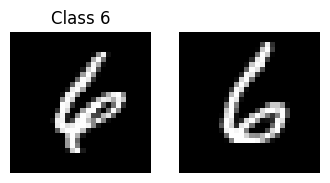

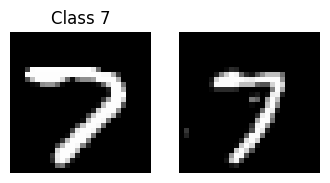

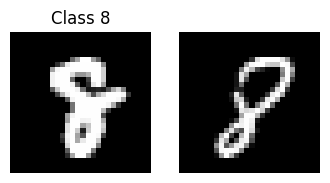

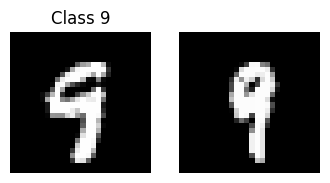

In [ ]:
sampled_df = df_mnist.groupby('class').sample(n=2, random_state=42)

for cls in sampled_df['class'].unique():
    imgs = sampled_df[sampled_df['class'] == cls].drop('class', axis=1).values
    plt.figure(figsize=(4, 2))  # Width for 2 images, height small
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(f'Class {cls}')
    plt.show()

## 5.3 Train a k-NN Classifier and Check the Performance

### 5.3.1 Import the required modules for classifier and performance measurement

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 5.3.2 Train the classifier using 3-fold cross_validation 
* create a training and testing set
* train the classifer with cross_validate, check the documentation: What does cross_validate return?

### 5.3.3 Use the best classifier from the previuous run and check with your test set 
* Generate a classification report
* Generate a confusion matrix

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

# 5.4 Train a Decision Tree Classifier and Check the Performance

In [65]:
from sklearn.tree import DecisionTreeClassifier

### 5.4.1 Train the classifier using 3-fold cross_validation

### 5.4.2 Check the performance with your test set

## 5.5 Improve with random forests

In [66]:
from sklearn.ensemble import RandomForestClassifier

## 5.6 Further improvement: Gradient Boosting (non Random) Forests

In [67]:
from sklearn.ensemble import GradientBoostingClassifier